**Инструкция по выполнению:**
    
Выполняйте задания прямо здесь, добавляйте ячейки если считаете нужным.

Ячейки с кодом должны быть выполнены, в первую очередь мы будем проверять результаты их работы.

В конце сохраните файл, переименуйте в  `your_last_name.ipynb` и перешлите нам на почту, указанную в письме.

### Построение графиков

Matplotlib -- удобный пакет для построения графиков, 
директива `%matplotlib inline` включает отображение графиков в ячейке, ее достаточно включить один раз.

Гайд по рисованию графиков есть например тут (http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

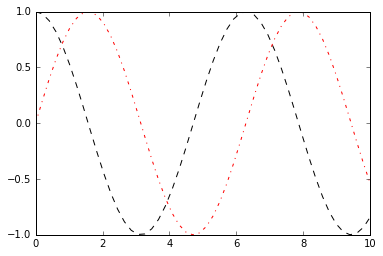

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0, 10)
Y = np.cos(X)
Z = np.sin(X)
plt.plot(X, Y, 'k--')
plt.plot(X, Z, 'r-.')

plt.show()

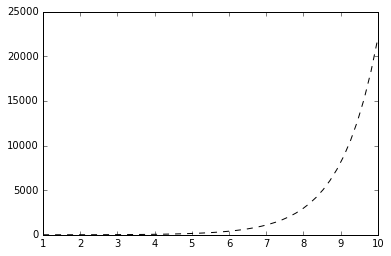

In [2]:
# Задание 0:
# постройте два графика: exp(x) и log(x)

X = np.linspace(1, 10)
Y = np.exp(X)

plt.plot(X, Y, 'k--')

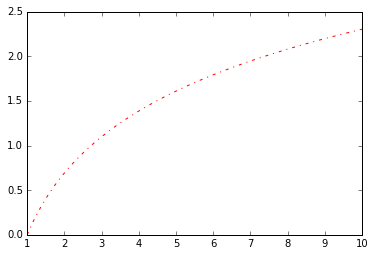

In [3]:
Z = np.log(X)
plt.plot(X, Z, 'r-.')

### Чтение текста
В файле `data/lentaru-2015.txt` содержится дамп новостей lenta.ru за 2015 год.

Прочитайте содержимое, посчитайте количество уникальных слов и какой длины нужен словарь для покрытия 95% датасета.
Выведете список 20 самых употребимых слов, запомните его.

In [80]:
def unique_list(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [120]:
from collections import Counter
import codecs

def file2cnt(split=None, unique=False, verbose=False):
    split_func = split or None
    cnt = Counter()
    mini_counter = 0
    with codecs.open("data/lentaru-2015.txt", "r", "utf-8") as fin:
        for line in fin:
            mini_counter += 1
            if split_func:
                words = split_func(line) if not unique else unique_list(split_func(line))
            else :
                words = line.split() if not unique else unique_list(line.split())
            cnt.update(words)
    print '{} unique words for {} total in dataset - {} lines'.format(len(cnt), sum(cnt.values()), mini_counter)
    for (w, f) in cnt.most_common(20):
        print w, f
    if verbose:
        return cnt, mini_counter
    else:
        return cnt

In [27]:
cnt = file2cnt()

461013 unique words for 6780579 total in dataset
в 277678
и 142339
на 126993
что 68493
с 68119
— 64658
по 52869
В 52723
не 44890
из 31470
этом 28171
о 27502
к 24849
за 24081
По 22704
для 22399
Об 20733
а 20606
от 20347
его 20277


## Предварительная подготовка
Постройте график покрытия от длины словаря. Должно получится что-то подобное:
![image](data/naive.png)
По оси X отложена длина словаря из n-самых употребимых слов, по оси Y -- доля слов из всего набора, которая описывается словарем.
Ошибочный вывод в необходимости словаря длиной 150k-200k слов возникает по нескольким причинам:
     
     - к словам могут "прилипать" знаки препинания
     - слова разных регистров считаются разными
     - разные словоформы одного слова считаются разными

In [124]:
def counter2XY(cnt, text_coverage=True, divide_by=None):
    devider = divide_by or None
    X = range(len(cnt))
    preY = [ x[1] for x in cnt.most_common(len(cnt))]
    if text_coverage:
        for ind in range(1, len(preY)):
            preY[ind] += preY[ind - 1]
    max_count = np.sum(cnt.values()) if text_coverage else devider
    Y = [float(preY[k])/max_count for k in range(len(preY))]
    return X, Y

In [84]:
def plotCounter(cnt):
    plt.plot(counter2XY(cnt))
    plt.xlabel('dictionary size')
    plt.ylabel('% text coverage')

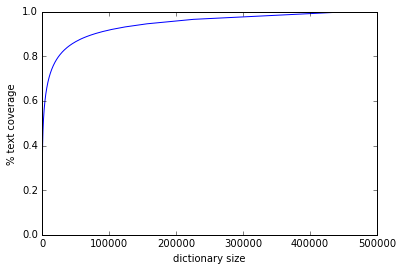

In [29]:
plotCounter(cnt)

In [30]:
s = u"Привет, мир! Привет мир."
for w in set(s.split()):
    print w

мир!
Привет
Привет,
мир.


### Задание первое
1. Устраните проблему со знаками препинания и регистром. Напишите функцию, принимающую строку, и возращающую правильную разбивку на слова. 
2. Постройте график покрытия. 


### NB
Обратите внимание на наличие в python 2.x двух типов строк: string и unicode.

Кириллица будет корректно отображаться в ipython notebook, но некоторые функции будут показывать странное поведение.

In [31]:
a = 'Привет мир'
print "{} -> {}".format(a, a.lower())
print type(a)
# проверка, присутствуют ли в содержимом только буквы и цифры:
print 'Привет'.isalnum()
print 'Привет!'.isalnum()

b = u'Привет мир'
print u"{} -> {}".format(b, b.lower())
print type(b)
print u'Привет'.isalnum()
print u'Привет!'.isalnum()

Привет мир -> Привет мир
<type 'str'>
False
False
Привет мир -> привет мир
<type 'unicode'>
True
False


In [59]:
# Задание 1.0:
# перепишите функцию new_split:

import string

translation_table = dict.fromkeys(map(ord, string.punctuation), None)

sample = u"Привет, мир! Привет мир."
def new_split(s):
    try:
        s = s.lower().translate(translation_table)
    except:
        s = s.lower().translate(None, string.punctuation)
    return s.split()

check = new_split(sample)
print u"\n".join(check)

# правильно работающая функция пройдет проверку:
assert len(check) == 4 and len(set(check)) == 2, 'Something wrong'

привет
мир
привет
мир


295496 unique words for 6778787 total in dataset
в 331620
и 144064
на 135879
по 76005
с 72081
что 69598
— 64668
не 45399
года 33945
из 32205
этом 29379
о 29305
об 27022
за 26969
к 26270
он 24908
для 24204
россии 23749
как 23636
его 22497


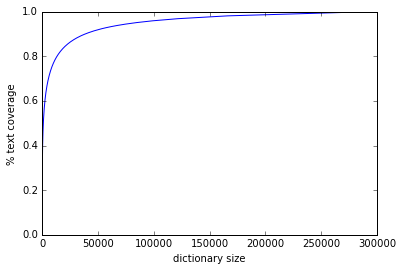

In [62]:
# Задание 1.5:
# постройте график доля покрытия текста vs. количество самых употребимых слов

words_counter = file2cnt(new_split)

plotCounter(words_counter)



## Задание второе
Решите проблему с разными словоформами.

1. Установите и запустите pymorphy2 (http://pymorphy2.readthedocs.org/en/latest/index.html)
2. Модифицируйте разбор строк так, чтобы разные словоформы одного слова считались одним
3. Постройте график покрытия

In [63]:
# Задание 2.0
# Уставновите pymorphy2, убедитесь, что он работает
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

for x in morph.parse(u'привет'):
    print x.word, x.normal_form, x.tag, x.score

привет привет NOUN,inan,masc sing,nomn 0.8
привет привет NOUN,inan,masc sing,accs 0.2


### NB

Обратите внимание на возможную омонимию, разный смысл слов с одинаковым написанием.
Для ее разрешения требуются дополнительные соображения.

В данном задании снимать неоднозначности не требуется и можно брать первый предлагаемый вариант.
Score для разных вариантов предлагается по частоте употребления в тренировочном корпусе pymorphy2.

In [64]:
for x in morph.parse(u'стали'):
    print x.word, x.normal_form, x.tag, x.score

стали стать VERB,perf,intr plur,past,indc 0.984662
стали сталь NOUN,inan,femn sing,gent 0.003067
стали сталь NOUN,inan,femn sing,datv 0.003067
стали сталь NOUN,inan,femn sing,loct 0.003067
стали сталь NOUN,inan,femn plur,nomn 0.003067
стали сталь NOUN,inan,femn plur,accs 0.003067


In [65]:
# Задание 2.3

translation_table = dict.fromkeys(map(ord, ',?.!/;:'), None)

sample = u"был быть есть стал стали"
def morphy_split(s):
    try:
        s = s.lower().translate(translation_table)
    except:
        s = s.lower().translate(None, ',?.!/;:')
    res = [ morph.parse(word)[0].normal_form for word in s.split() ]
    return res

sample_check = morphy_split(sample)
assert len(sample_check) == 5 and len(set(sample_check)) == 3, 'Something wrong'

183496 unique words for 6780310 total in dataset
в 340388
и 143975
на 135454
с 83002
по 75671
что 71478
год 66183
— 64662
быть 63210
о 56260
он 54312
это 51996
не 45328
который 39239
из 32151
россия 29514
за 26841
к 26482
для 24114
тот 24070


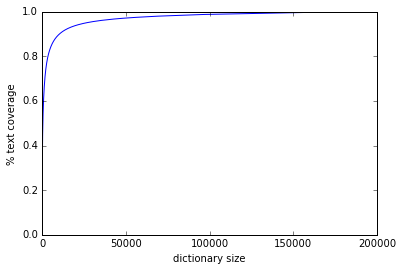

In [66]:
# Задание 2.7
# Пересчитайте разбивку на слова с новой функцией и постройте график покрытия

morph_word_counter = file2cnt(morphy_split)
plotCounter(morph_word_counter)

### Задание третье

Самые употребимые слова часто бесполезны для анализа и их заносят в стоп-лист. Одним из простых показателем для отнесения слова к стоп-словам является количество документов, содержащих это слово. Документом в данном случае считаем строчку в дампе.

1. Определите количество документов содержащих каждое уникальное слов.
2. Постройте график частоты употребления и встречаемости самых частотных слов.
3. Сравните список самых частотных слов с первоначальным, почему так получилось? Предложите вариант решения проблемы.
![image](data/tf-df.png)

In [121]:
# Задание 3.0
# Для каждого слова посчитайте количество документов, где оно употребляется и количество употреблений во всем корпусе.
# Абсолютные значения зависят от размеров корпуса, поэтому переведите количества в частоту употребления
inverse_document_counter, documents_number = file2cnt(morphy_split, unique=True, verbose=True)
term_counter, documents_number = file2cnt(morphy_split, verbose=True)

# inverse_document_frequency = ...
# term_frequency = ...


183496 unique words for 4702583 total in dataset - 35123 lines
в 34728
и 33045
на 32988
с 30066
по 28980
о 28235
это 28194
— 27349
что 26861
быть 26825
год 25143
он 22629
который 22336
не 22135
из 18765
сообщать 16523
к 16433
за 16092
как 16082
тот 16043
183496 unique words for 6780310 total in dataset - 35123 lines
в 340388
и 143975
на 135454
с 83002
по 75671
что 71478
год 66183
— 64662
быть 63210
о 56260
он 54312
это 51996
не 45328
который 39239
из 32151
россия 29514
за 26841
к 26482
для 24114
тот 24070


In [122]:
term_frequency_X, term_frequency_Y = counter2XY(term_counter, 
                                                text_coverage=True, 
                                                divide_by=documents_number)

In [125]:
document_frequency_X, document_frequency_Y = counter2XY(inverse_document_counter, 
                                                        text_coverage=False, 
                                                        divide_by=documents_number)

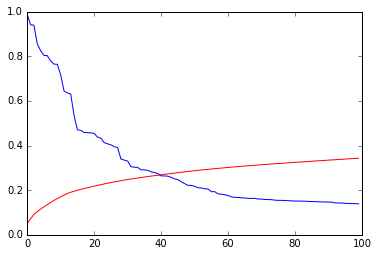

In [126]:
plt.plot(term_frequency_X[:100], term_frequency_Y[:100], 'r')
plt.plot(document_frequency_X[:100], document_frequency_Y[:100], 'b')

In [ ]:
# Задание 3.3
# Постройте совместно графики term-frequency и document-frequency для топ-20 топ-100 слов

plt.figure()
plt.plot(...)
plt.plot(...)
plt.show()

In [ ]:
# Задание 3.66
# Выведете топ-20 самых употребимых слов и ответьте на вопросы в следующей ячейке


Отличается ли новый список самых употребимых слов от первоначального?

> Нет. И вот почему ...
> Да?. И вот почему ...

Для чего мы можем использовать словарь с частотами?

Какие есть недостатки в посчитанных нами словарях?

Предложите как модернизировать процедуру подсчета, чтобы устранить недостатки.


## Рекомендации
1. Progressbar. При разборе большого файла или массива удобно знать что происходит и с какой скоростью.
    Для этого можно использовать пакет tqdm.
2. Toy dataset. Удобно тренироваться на маленьком кусочке текста, который быстро обрабатывается, а результат можно просмотреть глазами. Такой можно сделать, например с помощью команды в ячейке `! head data/lentaru-2015.txt data/toy.txt`.
        
        

In [25]:
from tqdm import tqdm
import time

for x in tqdm(range(100)):
    time.sleep(0.1)
    
! head data/lentaru-2015.txt

Президент России Владимир Путин в новогоднем обращении, которое транслировали федеральные телеканалы, пожелал россиянам эффективно и творчески трудиться для того, чтобы сделать год таким, каким им хочется. В наступающем году «нам вместе предстоит решить немало задач», а «год будет таким, каким мы сами его сделаем, насколько эффективно, творчески, результативно будет трудиться каждый из нас; других рецептов просто нет», — считает президент. Глава государства также поблагодарил граждан страны, в том числе жителей Крыма, «за сплоченность и солидарность, за глубокие чувства правды, чести, справедливости, ответственности за судьбу своей страны, за неизменную готовность отстаивать интересы России, быть вместе с ней и в дни триумфа, и в пору испытаний, добиваться исполнения наших самых смелых и масштабных планов». Среди таких проектов Путин назвал Олимпийские игры в Сочи. «Мы не только подготовили и провели лучшую в истории зимнюю Олимпиаду, но и победили в ней», — напомнил он. Президент такж